In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
import graphviz
from sklearn.metrics import accuracy_score as acc_rate 

In [2]:
p2p = pd.read_csv('p2p.csv', usecols = range(1,26)) # p2p = pd.read_csv('p2p.csv', index_col=0) 
p2p.head(10)

,ratio001,ratio002,ratio003,ratio004,ratio005,ratio006,ratio008,ratio011,ratio012,ratio017,...,DIO,DPO,DSO,turnover,status,nace,ratio036,ratio037,ratio039,ratio040
0,-0.238174,-0.155186,-0.124784,-0.422984,-0.441998,-0.281685,-0.476657,-3.467956,-3.405227,-1.297426,...,-0.297901,-0.462928,-0.722769,-0.381662,1,4635,1,1,1,1
1,-0.758472,-0.356497,-0.659060,-0.076745,0.260873,-0.515998,-1.119889,1.754630,0.921839,4.328932,...,-0.317154,-0.279493,-0.198444,4.591706,1,4791,1,1,1,1
2,-0.333616,-0.207378,0.508892,-0.263181,-0.496910,-0.276421,-0.372174,-0.547247,-0.088445,1.102322,...,-0.224098,-0.268703,-0.603186,0.408384,1,4752,1,1,1,1
3,-0.444811,-0.478278,-1.056660,0.145204,-0.255298,-0.239247,-0.424368,-3.467956,0.064050,1.449654,...,-0.166338,-0.398186,-0.685974,0.094786,1,4771,1,1,1,1
4,-0.479096,-0.523014,-1.156061,-0.902393,-0.749504,-0.371168,-0.400809,1.754630,-0.107507,0.039276,...,-0.320363,-0.160800,0.638637,0.040900,1,3212,1,1,1,1
5,-1.368040,-0.309276,-0.485109,-0.334205,-0.046633,-0.238589,3.449548,-0.118991,-3.405227,-0.213329,...,-0.317154,2.320963,-0.796358,0.000006,1,4941,1,1,1,1
6,-0.118640,-0.167613,-0.286309,-0.964539,-1.078975,-0.300766,-1.119889,-0.654312,0.921839,-0.518561,...,-0.073282,-0.732685,-0.685974,-0.108669,1,4711,1,1,1,1
7,-0.891442,-1.040260,-0.609360,-0.565031,-1.177817,-0.332019,-0.272288,-0.172523,-0.298127,-1.276376,...,-0.320363,5.485103,-0.198444,-0.131375,1,4120,1,1,1,1
8,-0.218252,-0.257084,-0.162059,-0.023477,0.271855,-0.250432,-0.138404,0.469861,0.369042,0.460284,...,-0.297901,-0.074478,-0.106457,-0.163345,1,1330,0,0,1,0
9,-0.355392,-0.291879,1.105293,1.148411,1.787421,4.064475,-1.119889,-3.467956,0.626378,-0.055451,...,-0.320363,0.055005,0.592644,-0.187972,1,4752,0,0,1,0


In [3]:
x = p2p.drop('status', axis=1)
y = p2p.status

# randomly choose 1/3 of samples as testing data
np.random.seed(12345)
test_id = np.random.randint(0, p2p.shape[0], p2p.shape[0] // 3)

# split samples into training set and test set
train_x, train_y = x.drop(test_id), y.drop(test_id)
test_x, test_y= x.iloc[test_id, :], y[test_id]

In [4]:
# initialize a decision tree classifier object with given arguments 
clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', ) 
clf.fit(X=train_x.values, y=train_y.values)

DecisionTreeClassifier(criterion='entropy')

In [5]:
# make prediction
pred_y = clf.predict(test_x)
pred = pd.DataFrame({'y': test_y, 'pred_y': pred_y})
pred.head(20)

,y,pred_y
4578,0,0
11749,0,0
2177,0,0
3492,0,0
11689,0,0
4094,0,0
4478,0,0
11621,0,1
546,1,1
7709,0,0


In [6]:
print('\nAccuracy rate is:\n', acc_rate(test_y, clf.predict(test_x)))


Accuracy rate is:
 0.8652043868394815


In [7]:
# visualizing the tree
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=x.columns.values, 
                                class_names=['0', '1'], 
                                filled=True, 
                                rounded=True, 
                                impurity=False, 
                                special_characters=True) 
graph = graphviz.Source(dot_data)
graph.render("p2p")

'p2p.pdf'

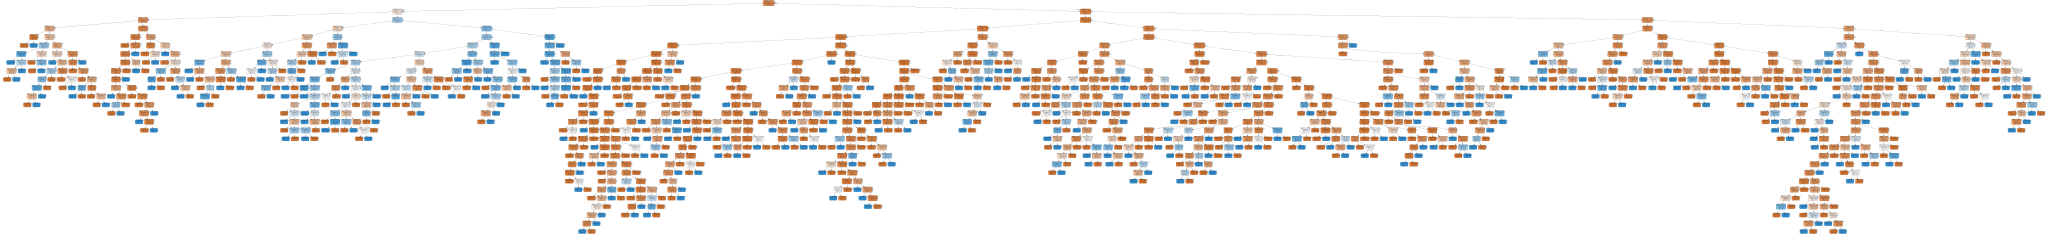

In [8]:
graph